In [1]:
import numpy as np
import pandas as pd 

from pandas_datareader.data import DataReader


from datetime import datetime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [4]:
df = pd.read_csv('ORCL_data.csv')
print(df.shape)
df.head()

(1257, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL


In [5]:
#Adding a new year column
df['year'] = pd.DatetimeIndex(df['date']).year

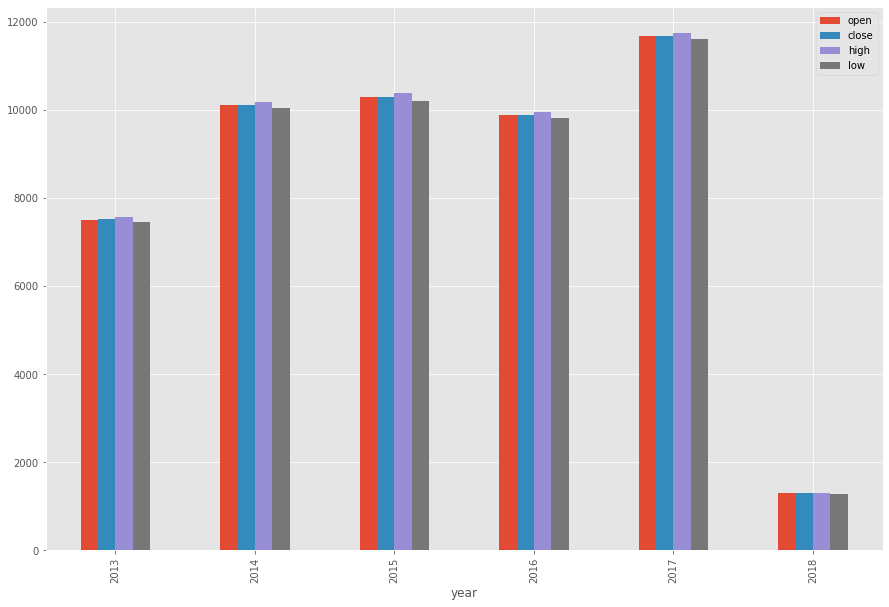

In [6]:
#visualizing yearly based on open, close, high and low stocks MAX
tempdf = df.groupby('year', as_index = False).sum()
tempdf.plot('year', ['open', 'close', 'high', 'low'], kind = 'bar')

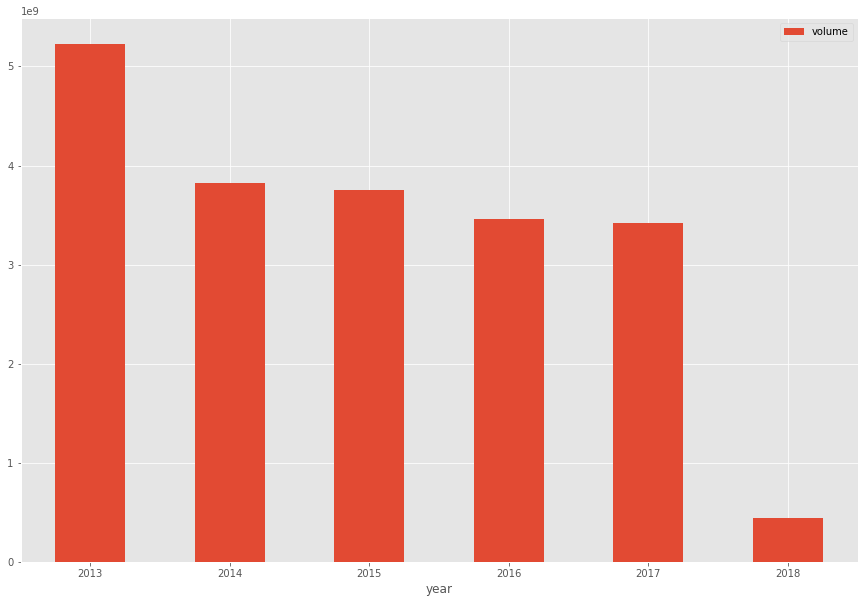

In [7]:
#visualizing the amount of stocks sold over year
x = df.groupby('year').sum().sort_values('volume', ascending = False)
x.plot.bar(y = 'volume', rot = 0)

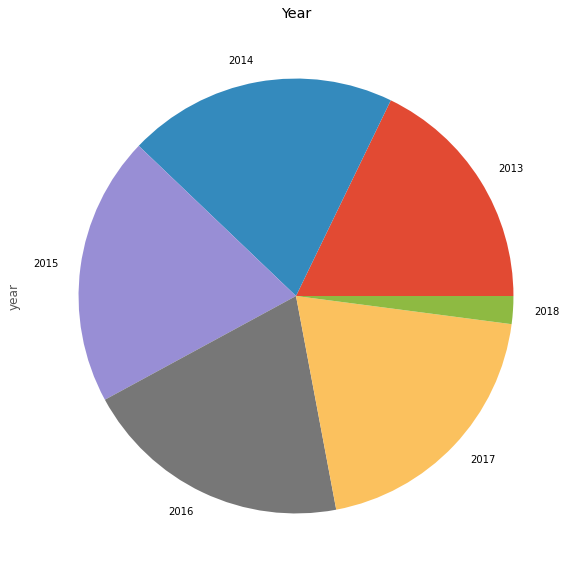

In [8]:
#visualizing the amount of data each year
df.groupby('year')['year'].agg('count').plot(kind='pie', title='Year')

In [9]:
newDf = df[(df.year==2013)]
newDf.volume.sum()
s = df.year.value_counts()
x = s.to_dict()
x

{2013: 224, 2014: 252, 2015: 252, 2016: 252, 2017: 251, 2018: 26}

In [10]:
def yearlyAllocatedData(years_dict,totalSize):
    allocation = []
    for i in years_dict:
        allocation.append((100 * years_dict[i] / totalSize))
        return allocation

In [11]:
print(yearlyAllocatedData(x,len(df)))

[20.047732696897373]


In [12]:
#filtering 2018 data since there is less data for that year
df = df[df['year'] != 2018]
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,34.76,34.98,34.500,34.90,19255621,ORCL,2013
1,2013-02-11,34.98,35.04,34.550,34.96,12648514,ORCL,2013
2,2013-02-12,34.89,35.25,34.850,35.11,14665754,ORCL,2013
3,2013-02-13,35.21,35.26,34.880,34.99,13176762,ORCL,2013
4,2013-02-14,34.87,35.07,34.690,34.90,15886750,ORCL,2013
...,...,...,...,...,...,...,...,...
1226,2017-12-22,47.23,47.40,47.095,47.36,11197347,ORCL,2017
1227,2017-12-26,47.37,47.58,47.250,47.43,7650197,ORCL,2017
1228,2017-12-27,47.25,47.47,47.150,47.38,8132189,ORCL,2017
1229,2017-12-28,47.30,47.55,47.300,47.52,7777596,ORCL,2017


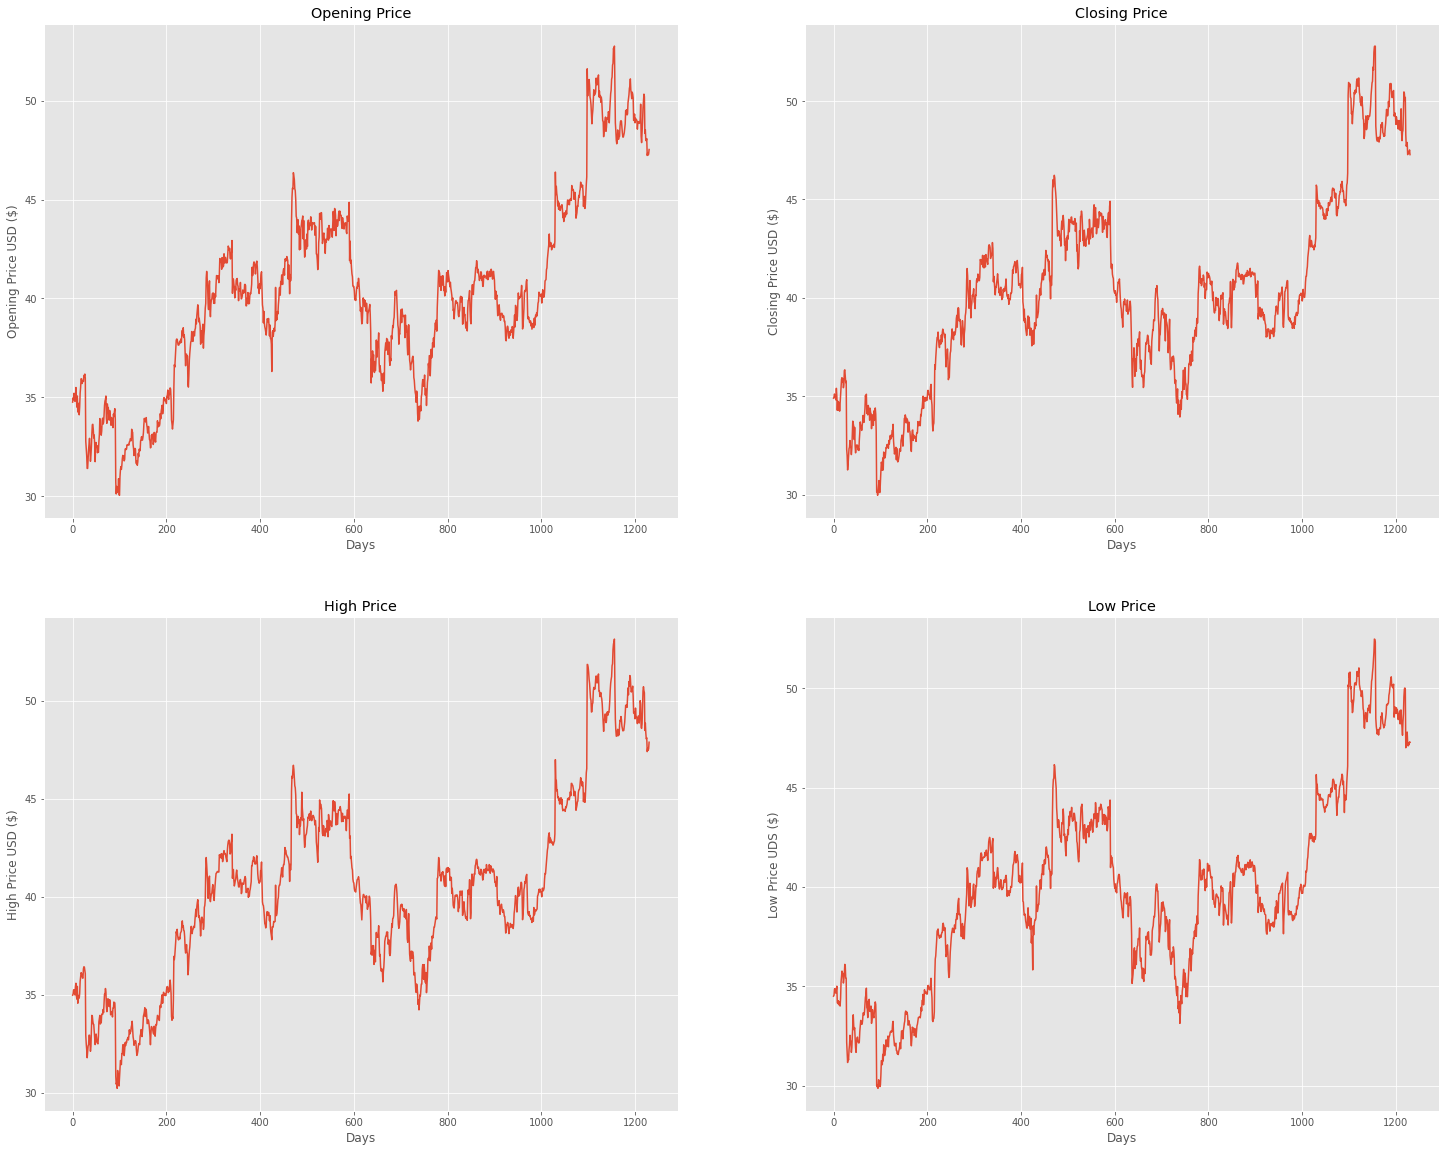

In [13]:
#graphical visualization of open, close, high and low stocks over days
fig = plt.figure(figsize=(25,20))

#visualizing the opening prices of the data
plt.subplot(2,2,1)
plt.title('Opening Price')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])

#visualizing the closing prices of the data
plt.subplot(2,2,2)
plt.title('Closing Price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])

#visualizing the high prices of the data
plt.subplot(2,2,3)
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])

#visualizing the low prices of the data
plt.subplot(2,2,4)
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Low Price UDS ($)')
plt.plot(df['low'])

plt.show()

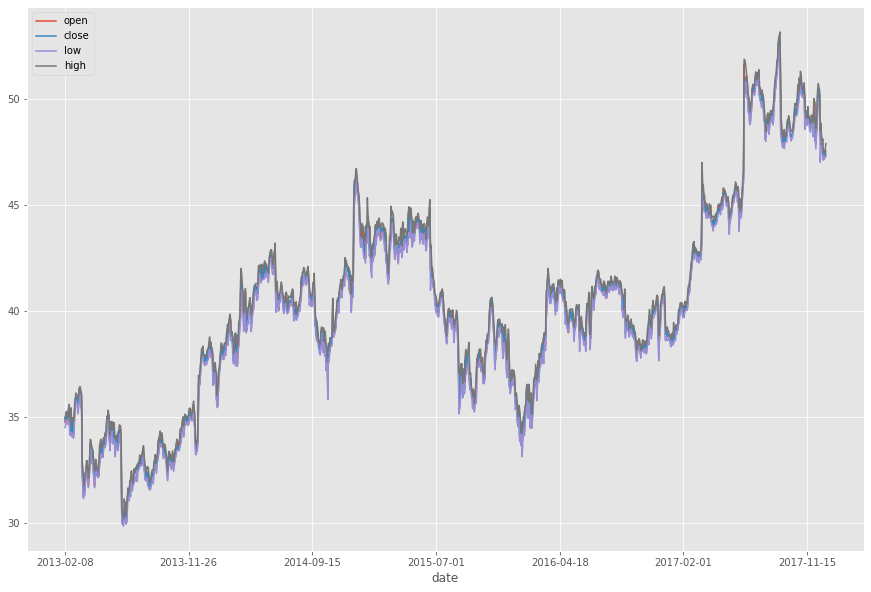

In [14]:
#graphical visualization of date over open, close, high and low stocks
df.plot(kind = 'line', x = 'date', y = ['open', 'close', 'low', 'high'])

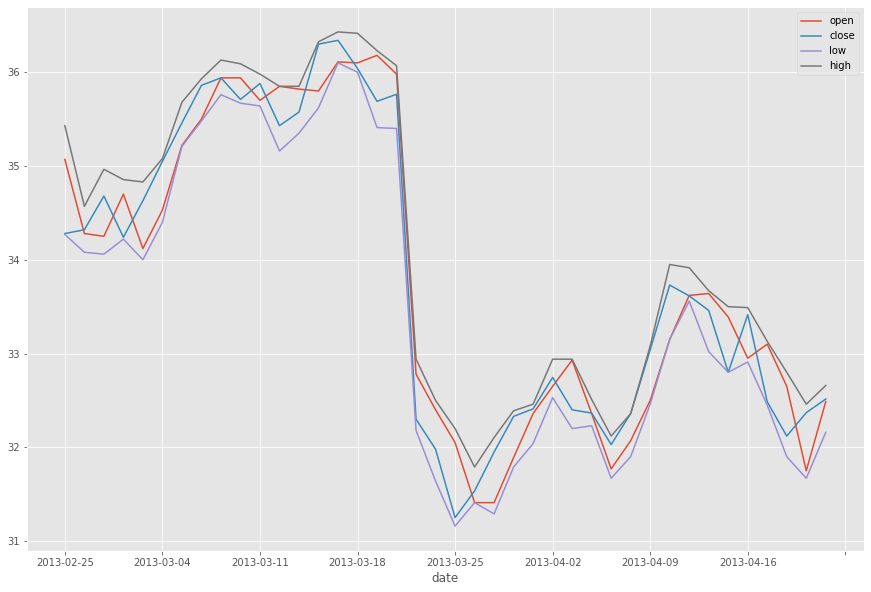

In [15]:
#graphical visualization of date over open, close, high, and low stocks (clear insights)
df[10:50].plot(kind = 'line', x = 'date', y = ['open', 'close', 'low', 'high'])

In [16]:
#graphical visualization of yearly based on open, close, high and low stocks over month
df['months'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL,2013,2
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL,2013,2
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL,2013,2
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL,2013,2
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL,2013,2


In [17]:
yearly_open_Pivot = pd.pivot_table(df, values = 'open', columns = 'year', index = 'months')
yearly_close_Pivot = pd.pivot_table(df, values = 'close', columns = 'year', index = 'months')
yearly_high_Pivot = pd.pivot_table(df, values = 'high', columns = 'year', index = 'months')
yearly_low_Pivot = pd.pivot_table(df, values = 'low', columns = 'year', index = 'months')

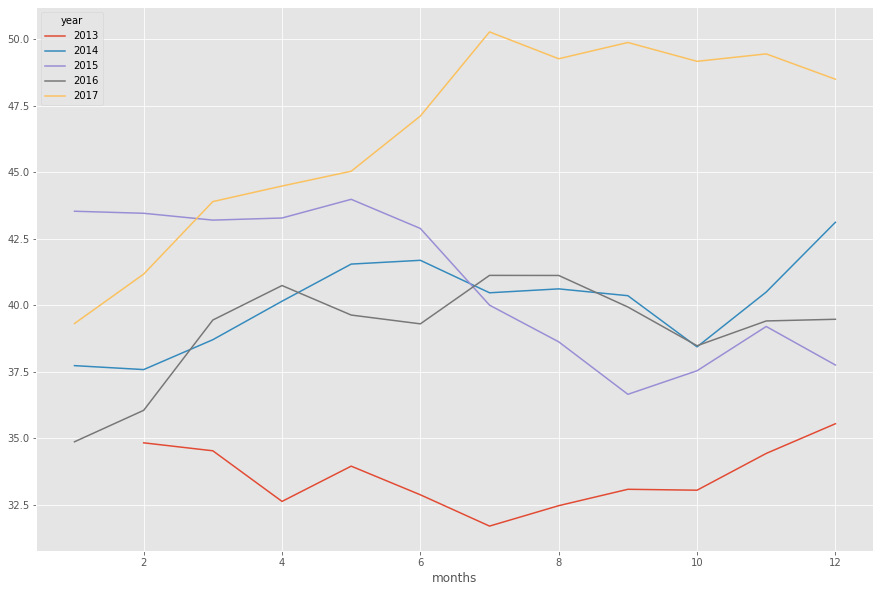

In [18]:
yearly_open_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ee429410>,
      dtype=object)

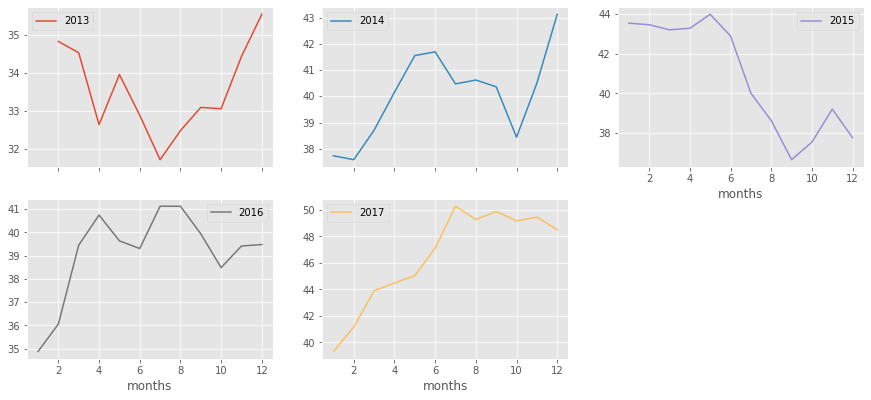

In [19]:
yearly_open_Pivot.plot(subplots = True, figsize = (15, 10), layout = (3,3))

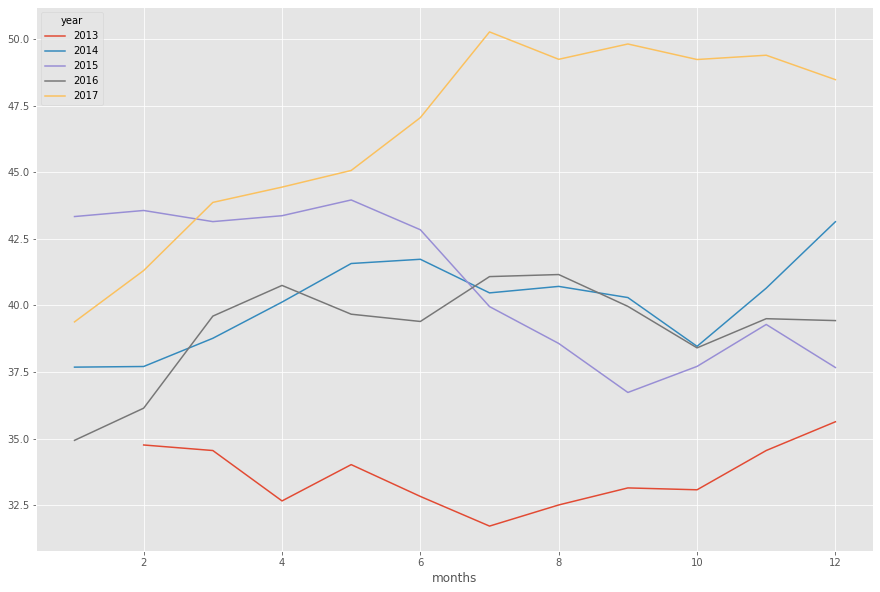

In [20]:
yearly_close_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ee084b90>,
      dtype=object)

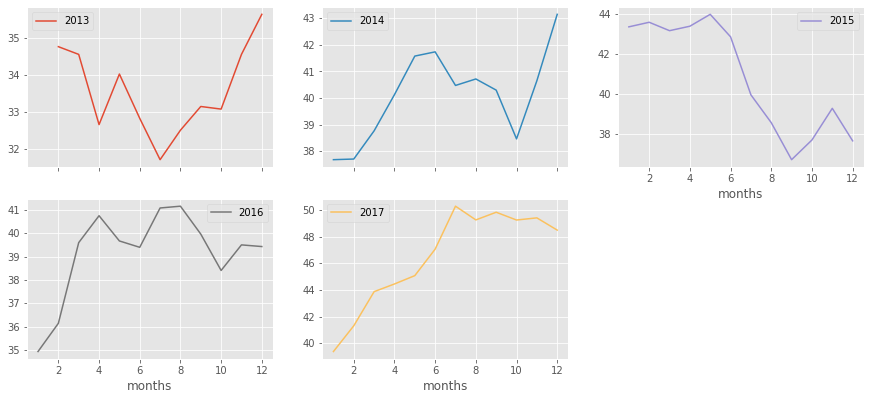

In [21]:
yearly_close_Pivot.plot(subplots = True, figsize = (15, 10), layout = (3, 3))

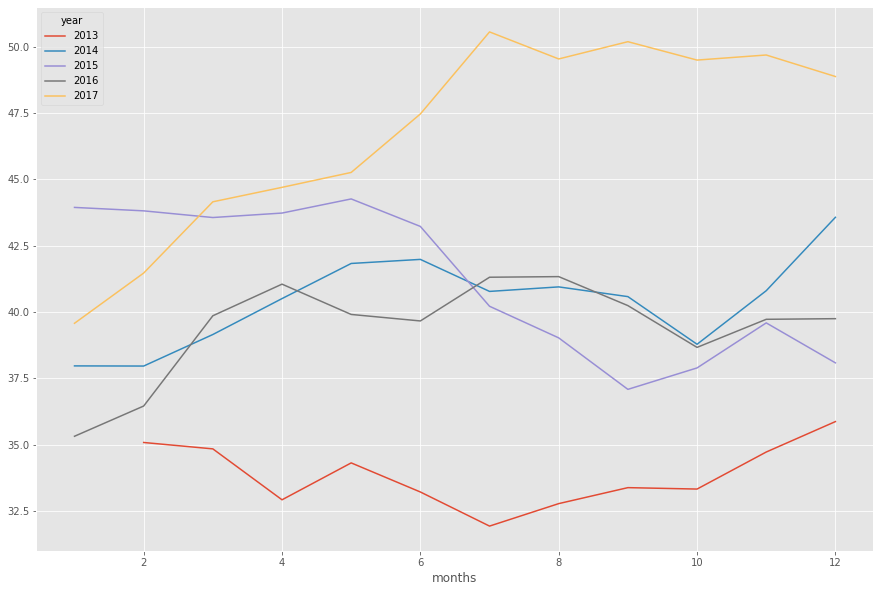

In [22]:
yearly_high_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ee47a510>,
      dtype=object)

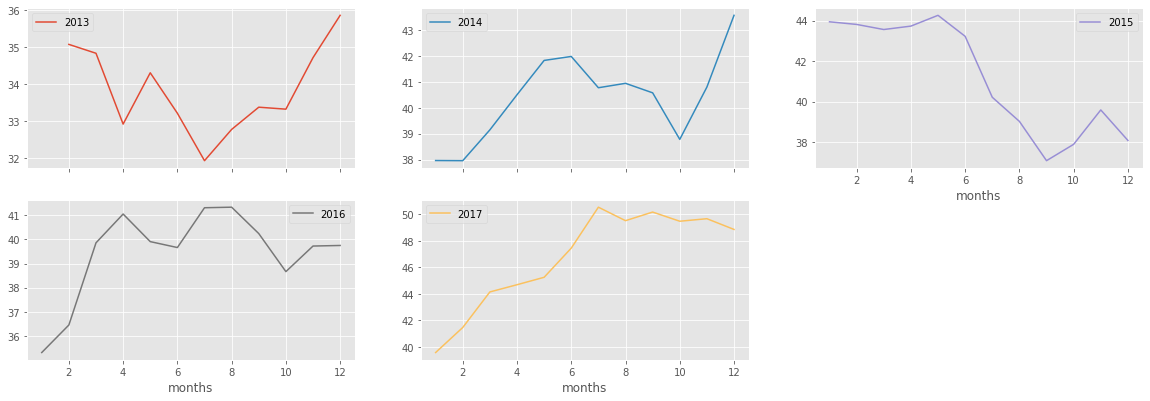

In [23]:
yearly_high_Pivot.plot(subplots = True, figsize = (20, 10), layout = (3, 3))

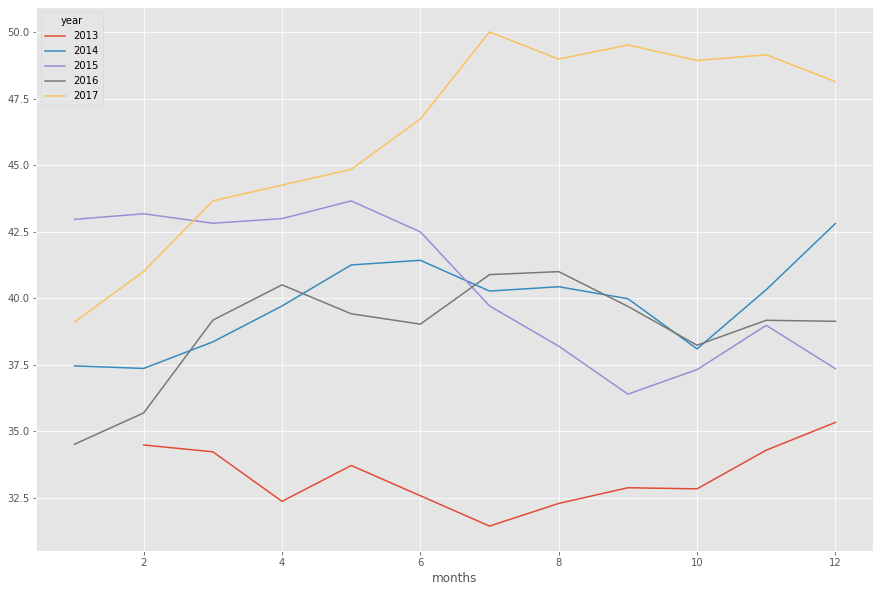

In [24]:
yearly_low_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ed8bd3d0>,
      dtype=object)

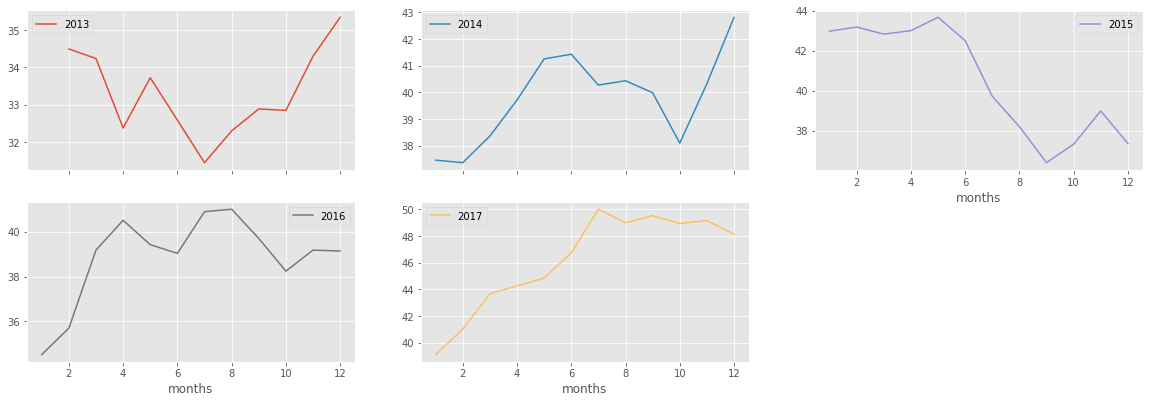

In [25]:
yearly_low_Pivot.plot(subplots = True, figsize = (20, 10), layout = (3, 3))

In [26]:
#predicting the closing price stock
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL,2013,2
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL,2013,2
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL,2013,2
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL,2013,2
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL,2013,2


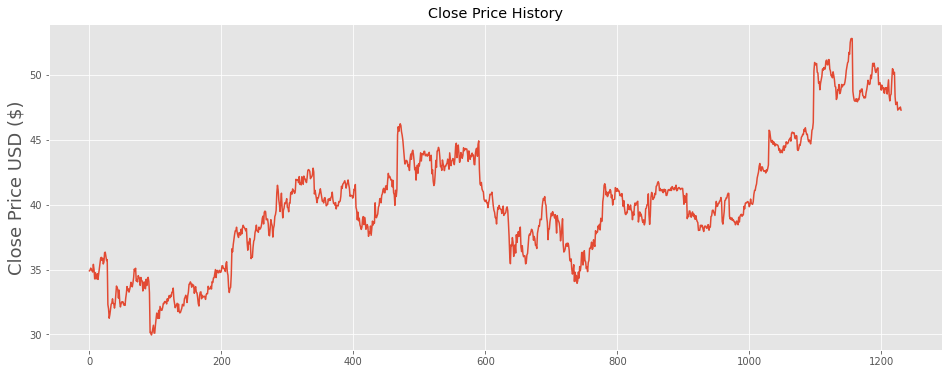

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
data = df.filter(['close'])
#convert the data to a numpy array
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

1170

In [29]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.21628722],
       [0.21891419],
       [0.22548161],
       ...,
       [0.76269702],
       [0.76882662],
       [0.75831874]])

In [30]:
#create the training dataset
train_data = scaled_data[0:int(training_data_len), :]
#split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.21628722, 0.21891419, 0.22548161, 0.22022767, 0.21628722,
       0.21234676, 0.23817863, 0.22088441, 0.18914186, 0.20971979,
       0.18914186, 0.19089317, 0.20665499, 0.18739054, 0.20446585,
       0.22285464, 0.2408056 , 0.25831874, 0.26182137, 0.25175131,
       0.2591944 , 0.23949212, 0.24584063, 0.27758319, 0.2793345 ,
       0.26619965, 0.25087566, 0.25415937, 0.10245184, 0.08844133,
       0.05647986, 0.06895797, 0.08712785, 0.10376532, 0.10726795,
       0.1219352 , 0.10683012, 0.10529772, 0.09063047, 0.10507881,
       0.13485114, 0.1650613 , 0.16002627, 0.15323993, 0.12434326,
       0.1512697 , 0.11055166, 0.09457093, 0.10551664, 0.11186515,
       0.10945709, 0.11164623, 0.10113835, 0.10503503, 0.09982487,
       0.1234676 , 0.14010508, 0.16330998, 0.1497373 , 0.15542907])]
[0.1444833625218913]

[array([0.21628722, 0.21891419, 0.22548161, 0.22022767, 0.21628722,
       0.21234676, 0.23817863, 0.22088441, 0.18914186, 0.20971979,
       0.18914186, 0.19089317, 0.206

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
history = model.fit(x_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
139/139 [==============================] - 15s 76ms/step - loss: 0.0067
Epoch 2/100
139/139 [==============================] - 12s 83ms/step - loss: 0.0022
Epoch 3/100
139/139 [==============================] - 11s 76ms/step - loss: 0.0018
Epoch 4/100
139/139 [==============================] - 11s 76ms/step - loss: 0.0019
Epoch 5/100
139/139 [==============================] - 12s 83ms/step - loss: 0.0014
Epoch 6/100
139/139 [==============================] - 11s 76ms/step - loss: 0.0012
Epoch 7/100
139/139 [==============================] - 11s 76ms/step - loss: 0.0011
Epoch 8/100
139/139 [==============================] - 11s 76ms/step - loss: 0.0011
Epoch 9/100
139/139 [==============================] - 10s 75ms/step - loss: 7.5358e-04
Epoch 10/100
139/139 [==============================] - 11s 76ms/step - loss: 7.4966e-04
Epoch 11/100
139/139 [==============================] - 10s 75ms/step - loss: 7.1837e-04
Epoch 12/100
139/139 [==============================] - 11s 76

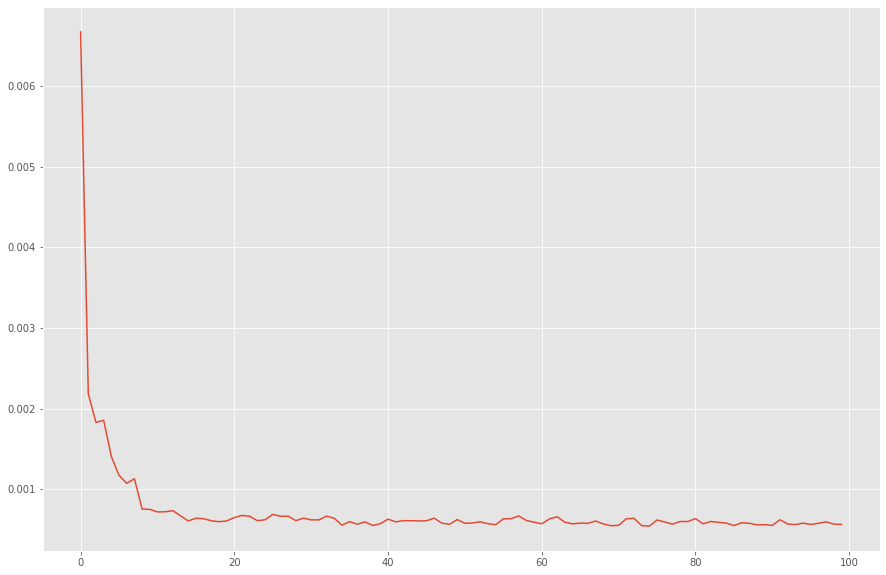

In [32]:
plt.plot(history.history['loss'])

In [33]:
#creating the test data
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error (rmse)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.5002697962476903

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


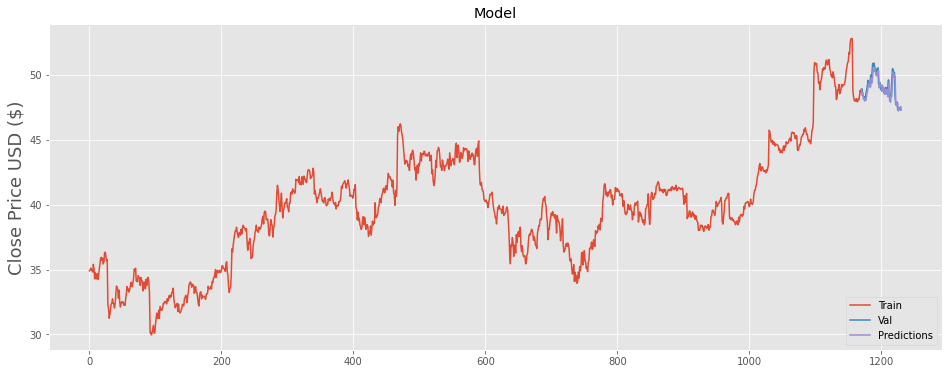

In [34]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [35]:
#show the valid and predicted prices
valid

,close,Predictions
1170,48.90,48.461639
1171,48.91,48.677372
1172,48.40,48.621086
1173,48.36,48.105156
1174,48.21,48.137001
...,...,...
1226,47.36,47.209335
1227,47.43,47.394051
1228,47.38,47.435116
1229,47.52,47.386150
